In [1]:
import numpy as  np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
main_data = pd.read_csv("predictive_maintenance-1.csv")
main_data.head(50)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,316.2,346.0,2161,46.3,52,1
1,293.9,292.9,1557,52.5,52,0
2,294.7,302.5,1986,41.9,32,0
3,289.3,301.8,2156,74.6,197,1
4,308.7,310.8,1453,83.1,207,1
5,277.0,339.3,1666,53.5,133,1
6,317.4,315.2,1942,30.7,161,0
7,292.4,304.6,1515,59.2,192,1
8,303.2,324.3,2593,48.3,181,1
9,297.5,306.0,1774,78.1,53,1


In [3]:
main_data.isnull().sum()

Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
dtype: int64

In [4]:
main_data.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,300.743333,315.848667,1894.366667,55.176000,124.216667,0.630000
std,9.452493,15.766226,409.061646,14.897494,68.175333,0.483611
min,272.100000,273.300000,1202.000000,14.600000,1.000000,0.000000
25%,294.075000,305.850000,1522.750000,45.875000,71.000000,0.000000
50%,300.900000,315.150000,1924.500000,55.350000,122.500000,1.000000
75%,306.850000,326.950000,2222.000000,63.950000,181.500000,1.000000
max,325.300000,374.400000,2593.000000,94.000000,247.000000,1.000000


In [5]:
main_data["Target"].value_counts()

Target
1    189
0    111
Name: count, dtype: int64

<Axes: xlabel='Target'>

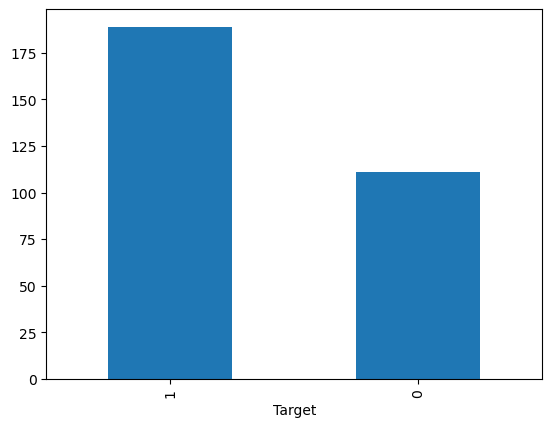

In [6]:
main_data["Target"].value_counts().plot(kind="bar")


### machine condition (0 = No failure, 1 = Failure)

In [7]:
main_data['Machine Condition'] = main_data['Target']

In [8]:
main_data = main_data.drop(columns ="Target")
main_data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine Condition
0,316.2,346.0,2161,46.3,52,1
1,293.9,292.9,1557,52.5,52,0
2,294.7,302.5,1986,41.9,32,0
3,289.3,301.8,2156,74.6,197,1
4,308.7,310.8,1453,83.1,207,1
...,...,...,...,...,...,...
295,297.0,336.8,2531,48.7,196,1
296,304.2,324.9,2229,59.9,148,1
297,307.8,329.8,2513,45.9,141,1
298,290.4,308.0,1328,77.2,184,1


In [9]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      300 non-null    float64
 1   Process temperature [K]  300 non-null    float64
 2   Rotational speed [rpm]   300 non-null    int64  
 3   Torque [Nm]              300 non-null    float64
 4   Tool wear [min]          300 non-null    int64  
 5   Machine Condition        300 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 14.2 KB


In [10]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      300 non-null    float64
 1   Process temperature [K]  300 non-null    float64
 2   Rotational speed [rpm]   300 non-null    int64  
 3   Torque [Nm]              300 non-null    float64
 4   Tool wear [min]          300 non-null    int64  
 5   Machine Condition        300 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 14.2 KB


In [11]:
main_data['Air temperature [K]'] = main_data['Air temperature [K]'].astype(int)

In [12]:
main_data['Process temperature [K]'] = main_data['Process temperature [K]'].astype(int)
main_data['Torque [Nm]'] = main_data['Torque [Nm]'].astype(int)

In [13]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Air temperature [K]      300 non-null    int64
 1   Process temperature [K]  300 non-null    int64
 2   Rotational speed [rpm]   300 non-null    int64
 3   Torque [Nm]              300 non-null    int64
 4   Tool wear [min]          300 non-null    int64
 5   Machine Condition        300 non-null    int64
dtypes: int64(6)
memory usage: 14.2 KB


In [14]:
main_data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine Condition
0,316,346,2161,46,52,1
1,293,292,1557,52,52,0
2,294,302,1986,41,32,0
3,289,301,2156,74,197,1
4,308,310,1453,83,207,1
...,...,...,...,...,...,...
295,297,336,2531,48,196,1
296,304,324,2229,59,148,1
297,307,329,2513,45,141,1
298,290,308,1328,77,184,1


In [15]:
main_data.groupby('Machine Condition').mean()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Machine Condition,,,,,
0,299.729730,311.207207,1724.027027,50.477477,95.423423
1,300.666667,317.809524,1994.407407,57.232804,141.126984


In [16]:
main_data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine Condition
0,316,346,2161,46,52,1
1,293,292,1557,52,52,0
2,294,302,1986,41,32,0
3,289,301,2156,74,197,1
4,308,310,1453,83,207,1
...,...,...,...,...,...,...
295,297,336,2531,48,196,1
296,304,324,2229,59,148,1
297,307,329,2513,45,141,1
298,290,308,1328,77,184,1


In [17]:
x = main_data.drop(columns = "Machine Condition")
y = main_data["Machine Condition"]

## Data Standardization

In [18]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [19]:
standardized_data = scaler.transform(x)

In [20]:
print(standardized_data)

[[ 1.66079332  1.9474754   0.65290608 -0.58673057 -1.06104843]
 [-0.77531933 -1.48550626 -0.82611107 -0.18363323 -1.06104843]
 [-0.66940139 -0.84976892  0.2243829  -0.92264501 -1.35489983]
 ...
 [ 0.70753185  0.86672191  1.51484985 -0.65391346  0.2465903 ]
 [-1.09307316 -0.46832651 -1.38686426  1.495939    0.87837081]
 [ 0.49569597  1.24816432  1.45608096  0.15228122 -1.39897754]]


In [21]:
x = standardized_data
y = main_data["Machine Condition"]

In [22]:
x

array([[ 1.66079332,  1.9474754 ,  0.65290608, -0.58673057, -1.06104843],
       [-0.77531933, -1.48550626, -0.82611107, -0.18363323, -1.06104843],
       [-0.66940139, -0.84976892,  0.2243829 , -0.92264501, -1.35489983],
       ...,
       [ 0.70753185,  0.86672191,  1.51484985, -0.65391346,  0.2465903 ],
       [-1.09307316, -0.46832651, -1.38686426,  1.495939  ,  0.87837081],
       [ 0.49569597,  1.24816432,  1.45608096,  0.15228122, -1.39897754]])

In [23]:
y

0      1
1      0
2      0
3      1
4      1
      ..
295    1
296    1
297    1
298    1
299    1
Name: Machine Condition, Length: 300, dtype: int64

## Train_Test_Split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

In [25]:
print(x.shape, x_train.shape, x_test.shape)

(300, 5) (240, 5) (60, 5)


In [26]:
# training the support vector classifier
classifier = svm.SVC(kernel = "linear")

classifier.fit(x_train, y_train)

SVC(kernel='linear')

## Model Evaluation

In [27]:
### Accuracy Score for training data

x_train_prediction = classifier.predict(x_train)

training_data_accuracy = accuracy_score(x_train_prediction, y_train)

print("Accuracy score of the training data : ", training_data_accuracy)

Accuracy score of the training data :  0.7791666666666667


In [28]:
### Accuracy Score for test data

x_test_prediction = classifier.predict(x_test)

test_data_accuracy = accuracy_score(x_test_prediction, y_test)

print("Accuracy score of the test data : ", test_data_accuracy)

Accuracy score of the test data :  0.75


In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, x_test_prediction)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_test, x_test_prediction)
print("Classification Report:\n", cr)

Confusion Matrix:
 [[13  9]
 [ 6 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.59      0.63        22
           1       0.78      0.84      0.81        38

    accuracy                           0.75        60
   macro avg       0.73      0.72      0.72        60
weighted avg       0.75      0.75      0.75        60



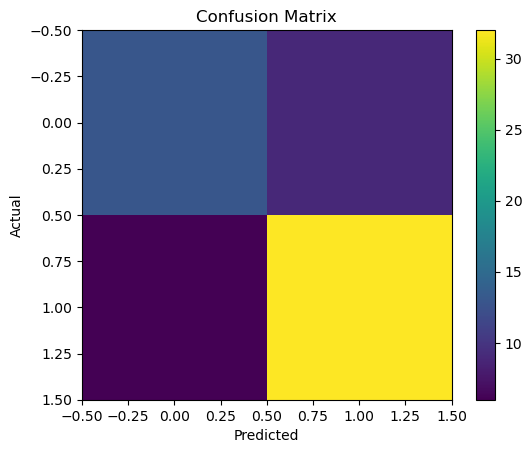

In [30]:
import matplotlib.pyplot as plt

plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()


### Improve Accuracy with Kernel Tuning

In [31]:
classifier = svm.SVC(kernel='rbf', C=1.0, gamma='scale')
classifier.fit(x_train, y_train)

x_test_prediction = classifier.predict(x_test)
print("Accuracy:", accuracy_score(y_test, x_test_prediction))


Accuracy: 0.85


In [32]:


param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(
    svm.SVC(),
    param_grid,
    refit=True,
    verbose=2,
    cv=5
)

grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

### Train model with best parameters

In [33]:
best_model = grid.best_estimator_

y_pred = best_model.predict(x_test)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Optimized Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        22
           1       0.89      0.89      0.89        38

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



In [34]:
import joblib


joblib.dump(best_model, "svm_predictive_maintenance_model.pkl")




['svm_predictive_maintenance_model.pkl']

In [35]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']